In [1]:
import pickle

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [2]:
# Define a transform to convert PIL images to PyTorch tensor (values in [0, 255])
transform = transforms.PILToTensor()

# Download and load the full MNIST training dataset,
# applying the PILToTensor transform to each image
ds_train_full = datasets.MNIST(
    root="./data",  # Directory to store the MNIST data
    train=True,  # Indicates this is the training set
    download=True,  # Download if the dataset is not already present
    transform=transform,  # Transform to apply to the images
)

# Download and load the full MNIST test dataset,
# also applying the PILToTensor transform
ds_test_full = datasets.MNIST(
    root="./data",  # Directory to store the MNIST data
    train=False,  # Indicates this is the test set
    download=True,  # Download if the dataset is not already present
    transform=transform,  # Transform to apply to the images
)

In [3]:
torch.manual_seed(42)
_X_train_pt, _Y_train_pt = next(
    iter(DataLoader(ds_train_full, batch_size=4000, shuffle=True))
)
print(_X_train_pt.shape)
print(_Y_train_pt.shape)

torch.Size([4000, 1, 28, 28])
torch.Size([4000])


In [4]:
_Y_train_pt = _Y_train_pt.unsqueeze(dim=-1)
print(_Y_train_pt.shape)

torch.Size([4000, 1])


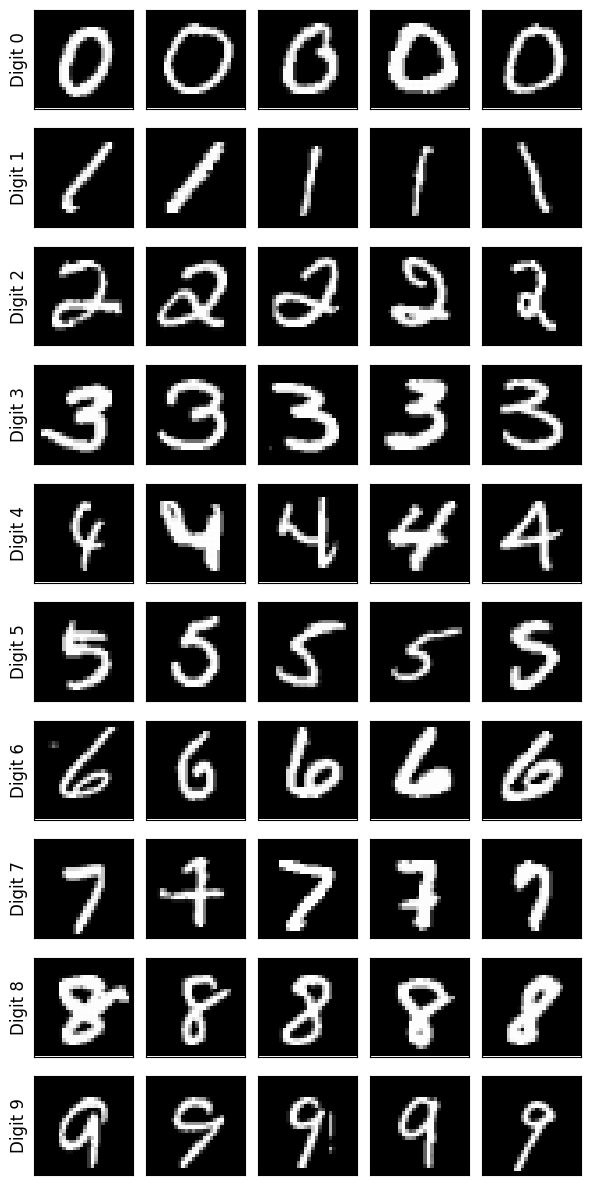

In [5]:
import matplotlib.pyplot as plt

num_row = 10  # Number of for digits 0–9
num_col = 5  # Number of images per digit
fig, axes = plt.subplots(num_row, num_col, figsize=(6, 12))  # Create a grid of subplots

for digit in range(num_row):  # Loop over each digit (0–9)
    idx_arr = torch.where(_Y_train_pt == digit)[
        0
    ]  # Find all indices in _y_train where the label equals the current digit
    for col in range(num_col):  # For each column (number of samples shown)
        idx = idx_arr[col]  # Get the index for the corresponding sample
        img = _X_train_pt[
            idx, ...
        ].squeeze(
            0
        )  # Extract and squeeze the image tensor (remove channel dimension if necessary)
        ax = axes[digit, col]  # Select the correct subplot
        ax.imshow(img, cmap="gray")  # Show the image in grayscale
        ax.set_title(f"Digit = {digit}")  # Set the plot title to the digit
        if col == 0:  # Only label the first column for clarity
            ax.set_ylabel(f"Digit {digit}", fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("")
fig.tight_layout()  # Optimize spacing
plt.show()  # Display the plot

In [6]:
_X_train = _X_train_pt.numpy()
_Y_train = _Y_train_pt.numpy()

In [7]:
data = dict(_X=_X_train, _Y=_Y_train)
with open("mnist_small.pickle", "wb") as file:
    pickle.dump(data, file)